In [312]:
# importing different libraries
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [313]:
data = pd.read_csv('MicrobeScopeDATA_full.csv',skipinitialspace = True)
data.head(50)

,ID,Name,Sublabel,Pathogen_type,R0,CFR_adult,Biosafety,Survive_surfaces,Survive_ideal,CFR_adult_grp,CFR_child,Hits,Hits_news,I_news,I_yucky,I_fear,I_ignored,I_attention,I_notoriety,Mode,Dose,Dose_grp,Dose_type,Incubation,Incubation_range,Incidence,Incidence_raw,Incidence_US,Incidence_Eur,Incidence_Af,Prevalence,Prevalence_raw,DALYs,DALYs_raw,DALYs_US,DALYs_Eur,DALYs_Af,Fatal,Fatal_raw,Fatal_US,Fatal_Eur,Fatal_Af,Peak,Peak_year,Vulnerable,Hotspots,Treatment,Effectiveness,Resistance
0,"Disease ID number, 1-78.",Disease name.,"Disease type, or whether treated / untreated.","Virus, bacterium or parasite.","Basic reproduction number, average estimate. N...",Adult case fatality rate (CFR): % of those who...,Biosafety containment / hazard level from 1 to...,"Max. survival time on surfaces, days",Max. survival in ideal conditions outside host...,Adult CFR grouped into seven categories: Virtu...,"Child case fatality rate (CFR), %. Age cutoff ...","Hits on google.co.uk, retrieved Jan 2018","Hits on google.co.uk, News, date range 2000-20...",Inflammation rating 1: MOST NEWS ATTENTION. Ne...,Inflammation rating 2: MOST YUCKY. Google news...,Inflammation rating 3: MOST FEAR INDUCING. Goo...,Press vs Contagiousness: MOST IGNORED. Contagi...,Press vs Incidence: OVER ATTENTION,Notoriety to fatalities rate ratio. Google hit...,"Primary mode of transmission: air droplets, bi...",Minimum infectious dose - minimum pathogen par...,Minimum infectious dose grouped - minimum path...,Human or animal. Was min. infectious dose asce...,"Incubation period, average number of days","Incubation period, range in days (from X to Y ...",New cases of disease per year for latest avail...,New cases of disease per year for latest avail...,New cases of disease per year for latest avail...,New cases of disease per year for latest avail...,New cases of disease per year for latest avail...,"Number of current cases, global, rounded, in m...","Number of current cases, global, not rounded",Disability-adjusted life years: Years per year...,Disability-adjusted life years: Years per year...,Disability-adjusted life years: Years per year...,Disability-adjusted life years: Years per year...,Disability-adjusted life years: Years per year...,Deaths per year: average or latest year. Globa...,Deaths per year: average or latest year. Globa...,Deaths per year: average or latest year. Unite...,Deaths per year: average or latest year. Europe.,Deaths per year: average or latest year. Africa.,Peak fatalities: highest deaths in worst histo...,Year of peak fatalities,Most vulnerable populations. Who gets infected...,"Geographical hotspots of disease: nations, areas",Primary treatment,How effective is the treatment listed?,Any resistance of pathogen to treatment noted?
1,79,COVID-19,Novel Coronavirus,virus,2,2%,3,-,-,Low,-,-,"1,10,00,00,000",-,-,-,-,NaN,NaN,air droplets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Anthrax,"(cutaneous, untreated)",bacterium,0,20.00%,3,-,-,Moderate,14%,"1,07,00,000","25,600",0.24,-,-,0,-,"5,35,00,000",air droplets,10,10,human,4,01-Jul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,-,-,-,-,"Antibiotics: Penicillin, ciprofloxacin (and ot...",-,-
3,2,Anthrax,(gastrointestinal),bacterium,0,50.00%,3,-,-,High,65%,"1,07,00,000","25,600",0.24,-,-,0,-,"2,14,00,000",air droplets,-,-,-,4,02-Jul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,64,"1979 outbreak, Soviet Union",-,-,-,-,-
4,3,Anthrax,(inhalation),bacterium,0,80.00%,3,-,-,Very high,60%,"1,07,00,000","25,600",0.24,-,-,0,-,"1,33,75,000",air droplets,"25,000","10,000",human,4,03-Jul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,-,-,-,-,-,-,-,-,-
5,4,C. difficile,NaN,bacterium,-,6.30%,2,150,-,Low,1.50%,"13,00,000","2,760",0.21,-,-,-,-,"2,06,34,921",fecal-oral,100,100,human,-,varies,-,-,"4,53,000","1,24,000",-,-,-,-,-,-,-,-,-,-,"7,300","3,700",-,"15,000","US only, 2011",Older adults in hospitals or long-term care fa...,-,-,-,-
6,5,Campylobacter,NaN,bacterium,0,0.02%,2,6,28,Virtuall

In [304]:
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop(labels=0, axis=0)
    df = df.drop(['Sublabel'], axis=1)
    df = df.drop(['ID','Treatment','Effectiveness','Resistance','Dose_type','Dose','Survive_surfaces','Survive_ideal',
                  'Dose_grp','Incidence_raw','I_notoriety','Incubation_range','CFR_adult_grp','I_news','I_yucky','I_fear','I_ignored',
                  'I_attention','Incidence_US','Incidence_Eur','Biosafety','Prevalence_raw','R0','CFR_child','Incubation','DALYs_raw','Incidence_Af','DALYs_US','DALYs_Eur','DALYs_Af',
                  'Fatal_raw','Fatal_US','Fatal_Eur','Fatal_Af','Vulnerable','Hotspots','Peak_year'], axis=1)
    
    
    df.replace(',','', regex=True, inplace=True)

    df['Incidence'] = df['Incidence'].replace('-','0')
    df['Prevalence'] = df['Prevalence'].replace('-','0')
    df['DALYs'] = df['DALYs'].replace('-','0')
    df['Fatal'] = df['Fatal'].replace('-','0')
    df['Peak'] = df['Peak'].replace('-','0')
    df['CFR_adult'] = df['CFR_adult'].str[:-1]
   

    df = df.dropna()
    df['Incidence'] = df['Incidence'].astype('float')
    df['Prevalence'] = df['Prevalence'].astype('float')
    df['Hits'] = df['Hits'].astype('float')
    df['Hits_news'] = df['Hits_news'].astype('float')
    df['DALYs'] = df['DALYs'].astype('float')
    df['Fatal'] = df['Fatal'].astype('float')
    df['Peak'] = df['Peak'].astype('float')
    
    
    df['Incidence'] = df['Incidence'].replace(0.0,df['Incidence'].mean())
    df['Prevalence'] = df['Prevalence'].replace(0.0,df['Prevalence'].mean())
    df['DALYs'] = df['DALYs'].replace(0.0,df['DALYs'].mean())
    df['Fatal'] = df['Fatal'].replace(0.0,df['Fatal'].mean())
    df['Peak'] = df['Peak'].replace(0.0,df['Peak'].mean())
   
    
    
   
    #df['CFR_adult'] = df['CFR_adult'].astype('float')
    return df

# Preprocessing the data
In this will handle null values, incorrect values, delete 

In [305]:
updated_data.columns

Index(['Name', 'Pathogen_type', 'CFR_adult', 'Hits', 'Hits_news', 'Mode',
       'Incidence', 'Prevalence', 'DALYs', 'Fatal', 'Peak'],
      dtype='object')

In [306]:
updated_data = preprocess_inputs(data)
updated_data.head(100)

,Name,Pathogen_type,CFR_adult,Hits,Hits_news,Mode,Incidence,Prevalence,DALYs,Fatal,Peak
2,Anthrax,bacterium,20.00,10700000.0,25600.0,air droplets,39.486653,36.952127,6.791286,141812.169231,2.079842e+06
3,Anthrax,bacterium,50.00,10700000.0,25600.0,air droplets,39.486653,36.952127,6.791286,141812.169231,6.400000e+01
4,Anthrax,bacterium,80.00,10700000.0,25600.0,air droplets,39.486653,36.952127,6.791286,141812.169231,2.079842e+06
5,C. difficile,bacterium,6.30,1300000.0,2760.0,fecal-oral,39.486653,36.952127,6.791286,141812.169231,1.500000e+04
6,Campylobacter,bacterium,0.02,3440000.0,5770.0,food and water,166.000000,36.952127,3.700000,37200.000000,2.079842e+06
...,...,...,...,...,...,...,...,...,...,...,...
75,Leishmaniasis,parasite,11.90,2620000.0,2840.0,bites,0.800000,0.030000,1.000000,13700.000000,2.079842e+06
76,Meningitis,bacterium,37.60,1060000.0,14000.0,air droplets,0.600000,1.700000,8.300000,127000.000000,2.079842e+06
77,Sleeping sickness,parasite,48.30,3600000.0,41500.0,bites,0.005000,0.007000,0.100000,2300.000000,2.079842e+06
78,Anthrax,bacterium,1.00,10700000.0,25600.0,air droplets,39.486653,36.952127,6.791286,141812.169231,2.079842e+06


In [307]:
updated_data.isna().sum()

Name             0
Pathogen_type    0
CFR_adult        0
Hits             0
Hits_news        0
Mode             0
Incidence        0
Prevalence       0
DALYs            0
Fatal            0
Peak             0
dtype: int64

In [309]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 2 to 79
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           78 non-null     object 
 1   Pathogen_type  78 non-null     object 
 2   CFR_adult      78 non-null     object 
 3   Hits           78 non-null     float64
 4   Hits_news      78 non-null     float64
 5   Mode           78 non-null     object 
 6   Incidence      78 non-null     float64
 7   Prevalence     78 non-null     float64
 8   DALYs          78 non-null     float64
 9   Fatal          78 non-null     float64
 10  Peak           78 non-null     float64
dtypes: float64(7), object(4)
memory usage: 7.3+ KB


<AxesSubplot:xlabel='Name'>

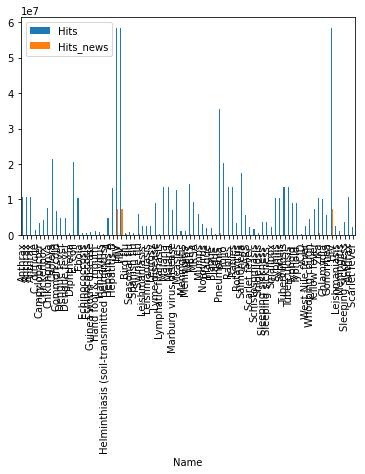

In [310]:
updated_data.plot(x="Name", y=["Hits", "Hits_news"], kind="bar")

In [311]:
updated_data.to_csv('cleaned.csv')